In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/CO2 Emissions_Canada.csv
/kaggle/input/Data Description.csv


read and load the dataset

In [1]:
import pandas as pd

# Replace 'your_file.csv' with the path to your dataset
df= pd.read_csv('/kaggle/input/CO2 Emissions_Canada.csv')

# Check if it's now a DataFrame
print(type(df))


<class 'pandas.core.frame.DataFrame'>


dataset description and understanding

In [3]:
import pandas as pd

# Display the first few rows of the dataset
print(df.head())


    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [8]:
df.describe()



,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Feature Engineering

In [10]:
import pandas as pd


df['Combined'] = df['Make'] + " " + df['Model'] + " " + df['Vehicle Class'] + ""

# Display the resulting DataFrame
print(df[['Make', 'Model', 'Vehicle Class', 'Combined']])


       Make        Model   Vehicle Class                          Combined
0     ACURA          ILX         COMPACT                 ACURA ILX COMPACT
1     ACURA          ILX         COMPACT                 ACURA ILX COMPACT
2     ACURA   ILX HYBRID         COMPACT          ACURA ILX HYBRID COMPACT
3     ACURA      MDX 4WD     SUV - SMALL         ACURA MDX 4WD SUV - SMALL
4     ACURA      RDX AWD     SUV - SMALL         ACURA RDX AWD SUV - SMALL
...     ...          ...             ...                               ...
7380  VOLVO  XC40 T5 AWD     SUV - SMALL     VOLVO XC40 T5 AWD SUV - SMALL
7381  VOLVO  XC60 T5 AWD     SUV - SMALL     VOLVO XC60 T5 AWD SUV - SMALL
7382  VOLVO  XC60 T6 AWD     SUV - SMALL     VOLVO XC60 T6 AWD SUV - SMALL
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD  VOLVO XC90 T5 AWD SUV - STANDARD
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD  VOLVO XC90 T6 AWD SUV - STANDARD

[7385 rows x 4 columns]


In [11]:
# Replace 'Make' column with the 'Combined' column
df['Make'] = df['Combined']

# Drop the 'Combined' column
df = df.drop(columns=['Combined'])
# Rename 'Make' column to 'Vehicle Class'
df = df.rename(columns={'Make': 'combine Vehicle Class'})




In [12]:
# Drop the specified columns from the DataFrame
df = df.drop(columns=['Model', 'Vehicle Class'])

# Display the updated DataFrame
print(df.head())


       combine Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0          ACURA ILX COMPACT             2.0          4          AS5   
1          ACURA ILX COMPACT             2.4          4           M6   
2   ACURA ILX HYBRID COMPACT             1.5          4          AV7   
3  ACURA MDX 4WD SUV - SMALL             3.5          6          AS6   
4  ACURA RDX AWD SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                      

EDA

In [13]:
# Display the data types of each column
print(df.dtypes)


combine Vehicle Class                object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


In [14]:
df.head()

,combine Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA ILX COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA ILX COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA ILX HYBRID COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA MDX 4WD SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA RDX AWD SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [15]:
# Get the total number of rows in the DataFrame
total_rows = len(df)

print(f"Total number of rows: {total_rows}")


Total number of rows: 7385


In [16]:
# Count the number of duplicate rows across all columns
total_duplicates = df.duplicated().sum()

print(f"Total number of duplicate rows across all columns: {total_duplicates}")


Total number of duplicate rows across all columns: 1103


In [17]:
# View the rows that are duplicates
duplicate_rows = df[df.duplicated()]

print(f"Duplicate rows:\n{duplicate_rows}")


Duplicate rows:
                      combine Vehicle Class  Engine Size(L)  Cylinders  \
1075              ACURA RDX AWD SUV - SMALL             3.5          6   
1076                     ACURA RLX MID-SIZE             3.5          6   
1081               ALFA ROMEO 4C TWO-SEATER             1.8          4   
1082           ASTON MARTIN DB9 MINICOMPACT             5.9         12   
1084     ASTON MARTIN V8 VANTAGE TWO-SEATER             4.7          8   
...                                     ...             ...        ...   
7356  TOYOTA Tundra PICKUP TRUCK - STANDARD             5.7          8   
7365            VOLKSWAGEN Golf GTI COMPACT             2.0          4   
7366               VOLKSWAGEN Jetta COMPACT             1.4          4   
7367               VOLKSWAGEN Jetta COMPACT             1.4          4   
7368           VOLKSWAGEN Jetta GLI COMPACT             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
1075          AS6         Z   

In [18]:
# Check for duplicate rows
duplicates = df.duplicated().sum()

# Remove duplicates
df = df.drop_duplicates()
duplicates = df.duplicated().sum()
# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [19]:
# Get the unique values in the 'Fuel Type' column
unique_values = df['combine Vehicle Class'].nunique()

print(f"Unique combine types: {unique_values}")


Unique combine types: 2104


In [20]:
# Check for null values in each column
null_values = df.isnull().sum()

# Print the number of null values per column
print("Null values per column:\n", null_values)


Null values per column:
 combine Vehicle Class               0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [21]:
print (len (df))

6282


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


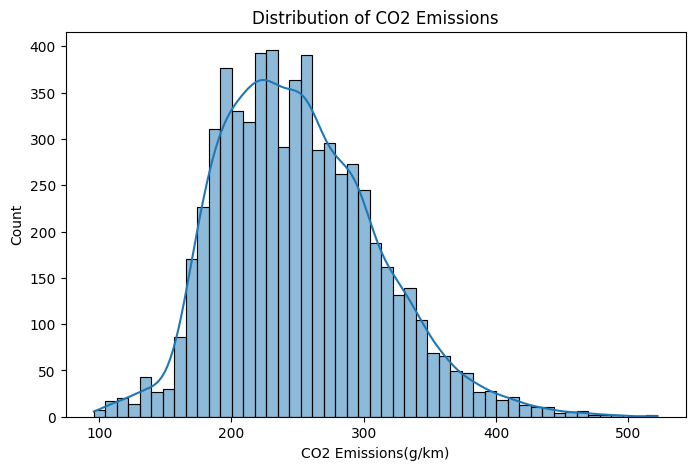

Plot saved at: /kaggle/working/co2_distribution.png


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of CO2 Emissions
plt.figure(figsize=(8, 5))
sns.histplot(df['CO2 Emissions(g/km)'], kde=True)
plt.title("Distribution of CO2 Emissions")

# Save the figure in Kaggle's working directory
file_path = "/kaggle/working/co2_distribution.png"
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved at: {file_path}")


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


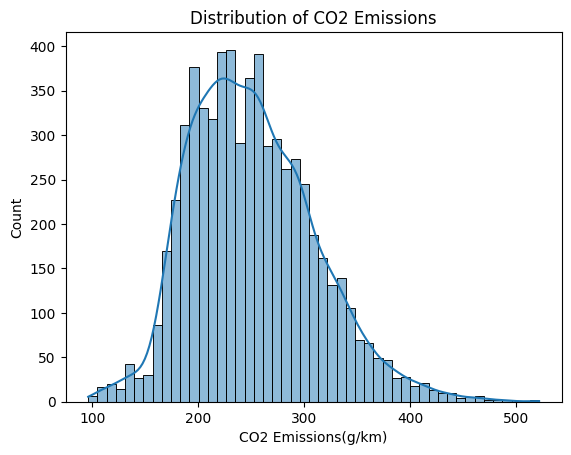

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of CO2 Emissions
sns.histplot(df['CO2 Emissions(g/km)'], kde=True)
plt.title("Distribution of CO2 Emissions")
plt.show()


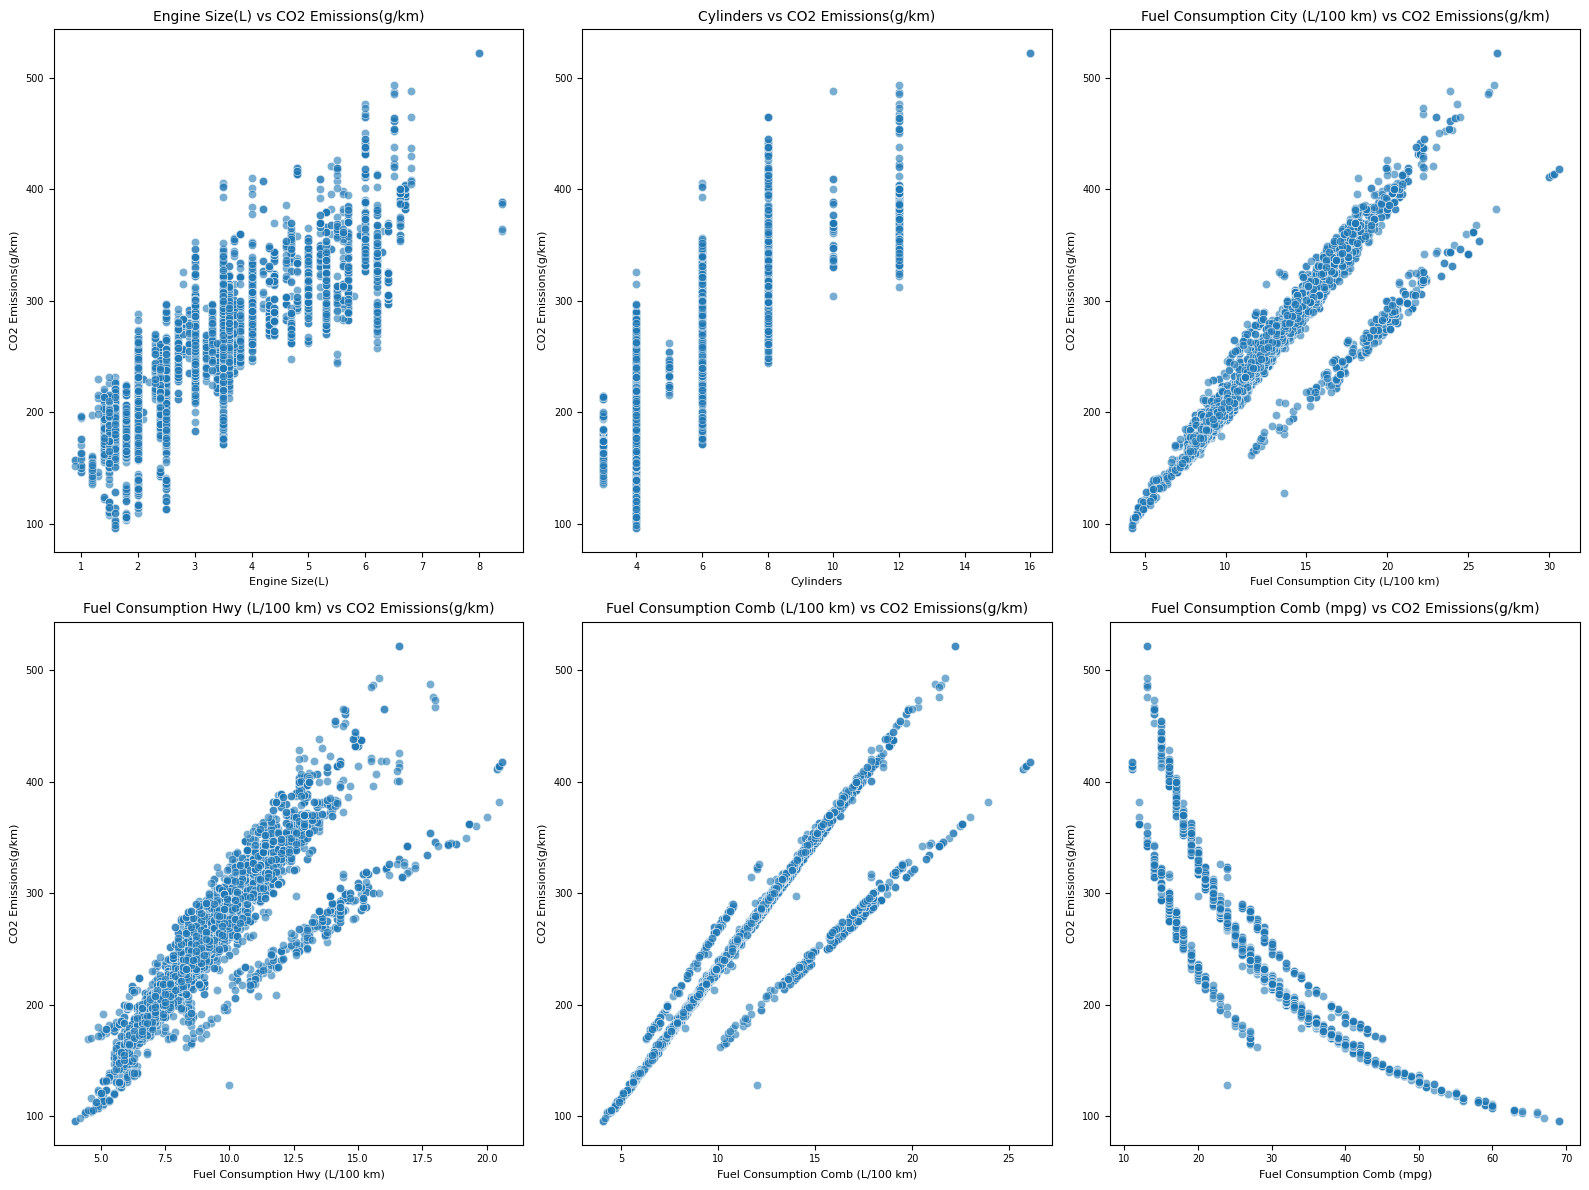

Plot saved at: /kaggle/working/scatter_plots.png


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for all plots
plt.figure(figsize=(16, 12))

# Filter only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
target_column = 'CO2 Emissions(g/km)'

# Ensure the target column is in the dataset
if target_column in numeric_columns:
    numeric_columns = numeric_columns.drop(target_column)  # Drop target column from independent variables

# Number of columns to plot
total_columns = len(numeric_columns)

# Calculate number of rows and columns needed for subplots
rows = (total_columns // 3) + (1 if total_columns % 3 != 0 else 0)  # Calculate rows dynamically
cols = 3  # Number of columns per row

# Loop through each numeric column to generate scatter plots
for i, column in enumerate(numeric_columns):
    plt.subplot(rows, cols, i + 1)  # Create subplot grid
    sns.scatterplot(x=df[column], y=df[target_column], alpha=0.6)
    plt.title(f'{column} vs {target_column}', fontsize=10)
    plt.xlabel(column, fontsize=8)
    plt.ylabel(target_column, fontsize=8)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)

plt.tight_layout()  # Adjust layout for better spacing

# Save the figure in Kaggle's working directory
file_path = "/kaggle/working/scatter_plots.png"
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved at: {file_path}")


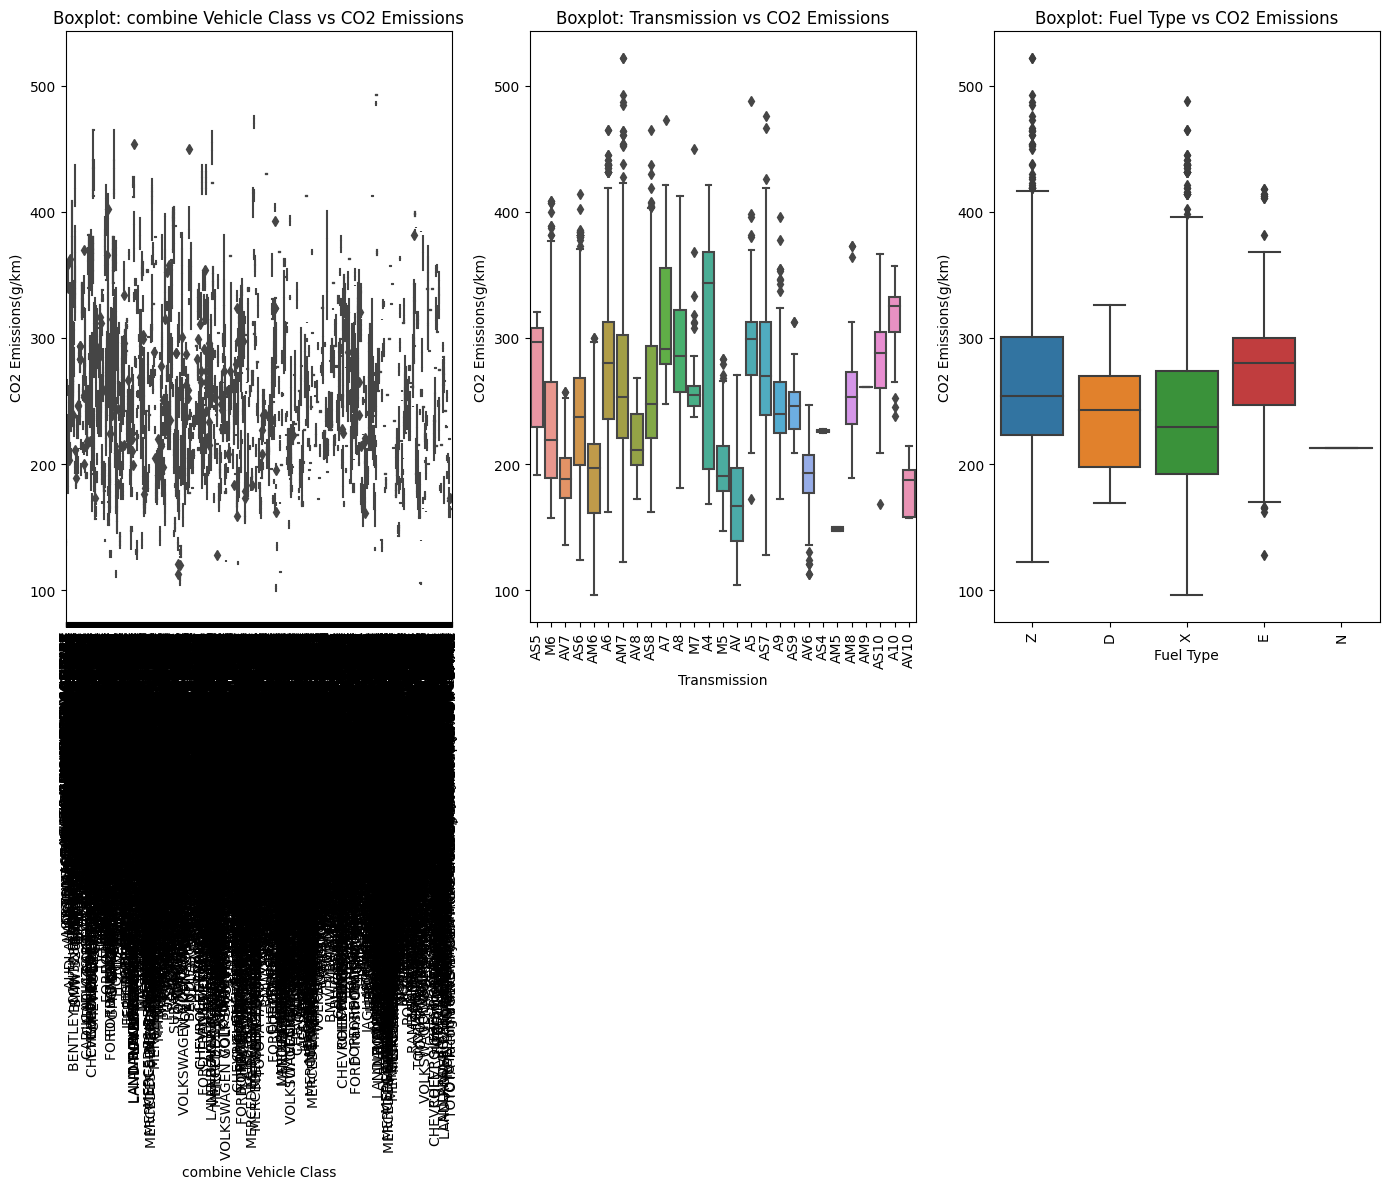

Plot saved at: /kaggle/working/boxplots_categorical.png


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for all plots
plt.figure(figsize=(14, 12))

# Filter only categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Number of columns to plot
total_columns = len(categorical_columns)

# Calculate number of rows and columns needed for subplots
rows = (total_columns // 3) + 1 if total_columns % 3 != 0 else total_columns // 3
cols = 3  # We use 3 columns

# Loop through each categorical column to generate box plots
for i, column in enumerate(categorical_columns):
    plt.subplot(rows, cols, i + 1)  # Adjusting for dynamic rows and columns
    sns.boxplot(x=df[column], y=df['CO2 Emissions(g/km)'])
    plt.title(f'Boxplot: {column} vs CO2 Emissions')
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.tight_layout()  # Adjust layout for better spacing

# Save the figure in Kaggle's working directory
file_path = "/kaggle/working/boxplots_categorical.png"
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved at: {file_path}")


In [14]:
from sklearn.preprocessing import StandardScaler

# Step 1: Select only numerical columns for scaling
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Initialize the StandardScaler
scaler = StandardScaler()

# Step 3: Fit and transform the numerical columns to standardize
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the first few rows of the standardized DataFrame
print(df.head())


       combine Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0          ACURA ILX COMPACT       -0.851086  -0.876934          AS5   
1          ACURA ILX COMPACT       -0.558066  -0.876934           M6   
2   ACURA ILX HYBRID COMPACT       -1.217362  -0.876934          AV7   
3  ACURA MDX 4WD SUV - SMALL        0.247740   0.206429          AS6   
4  ACURA RDX AWD SUV - SMALL        0.247740   0.206429          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                         -0.762844   
1         Z                         -0.396934   
2         Z                         -1.860575   
3         Z                          0.025270   
4         Z                         -0.143611   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                        -1.040321                         -0.854490   
1                        -0.601475                         -0.481184   
2                        -1.435283                      

In [25]:
from sklearn.preprocessing import StandardScaler

# Define the target column
target_column = 'CO2 Emissions(g/km)'

# Step 1: Select only numerical columns for scaling, excluding the target column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(target_column)

# Step 2: Initialize the StandardScaler
scaler = StandardScaler()

# Step 3: Fit and transform the numerical columns to standardize
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 4: Retain the target column as-is
df[target_column] = df[target_column] 

print(df.head())


       combine Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0          ACURA ILX COMPACT       -0.851086  -0.876934          AS5   
1          ACURA ILX COMPACT       -0.558066  -0.876934           M6   
2   ACURA ILX HYBRID COMPACT       -1.217362  -0.876934          AV7   
3  ACURA MDX 4WD SUV - SMALL        0.247740   0.206429          AS6   
4  ACURA RDX AWD SUV - SMALL        0.247740   0.206429          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                         -0.762844   
1         Z                         -0.396934   
2         Z                         -1.860575   
3         Z                          0.025270   
4         Z                         -0.143611   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                        -1.040321                         -0.854490   
1                        -0.601475                         -0.481184   
2                        -1.435283                      

encoding the catagorical data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   combine Vehicle Class             6282 non-null   object 
 1   Engine Size(L)                    6282 non-null   float64
 2   Cylinders                         6282 non-null   float64
 3   Transmission                      6282 non-null   object 
 4   Fuel Type                         6282 non-null   object 
 5   Fuel Consumption City (L/100 km)  6282 non-null   float64
 6   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 7   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Comb (mpg)       6282 non-null   float64
 9   CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 539.9+ KB


In [26]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# List of columns to label encode (update this list as needed)
columns_to_encode = ['Fuel Type', 'Transmission', 'combine Vehicle Class']

# Apply label encoding to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Check the result
df.head()


,combine Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,-0.851086,-0.876934,14,4,-0.762844,-1.040321,-0.854490,0.771454,196
1,0,-0.558066,-0.876934,25,4,-0.396934,-0.601475,-0.481184,0.219329,221
2,1,-1.217362,-0.876934,22,4,-1.860575,-1.435283,-1.736851,2.841921,136
3,2,0.247740,0.206429,15,4,0.025270,0.012910,0.027870,-0.332795,255
4,10,0.247740,0.206429,15,4,-0.143611,-0.162629,-0.141815,-0.056733,244


visualize

In [27]:
# Define numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


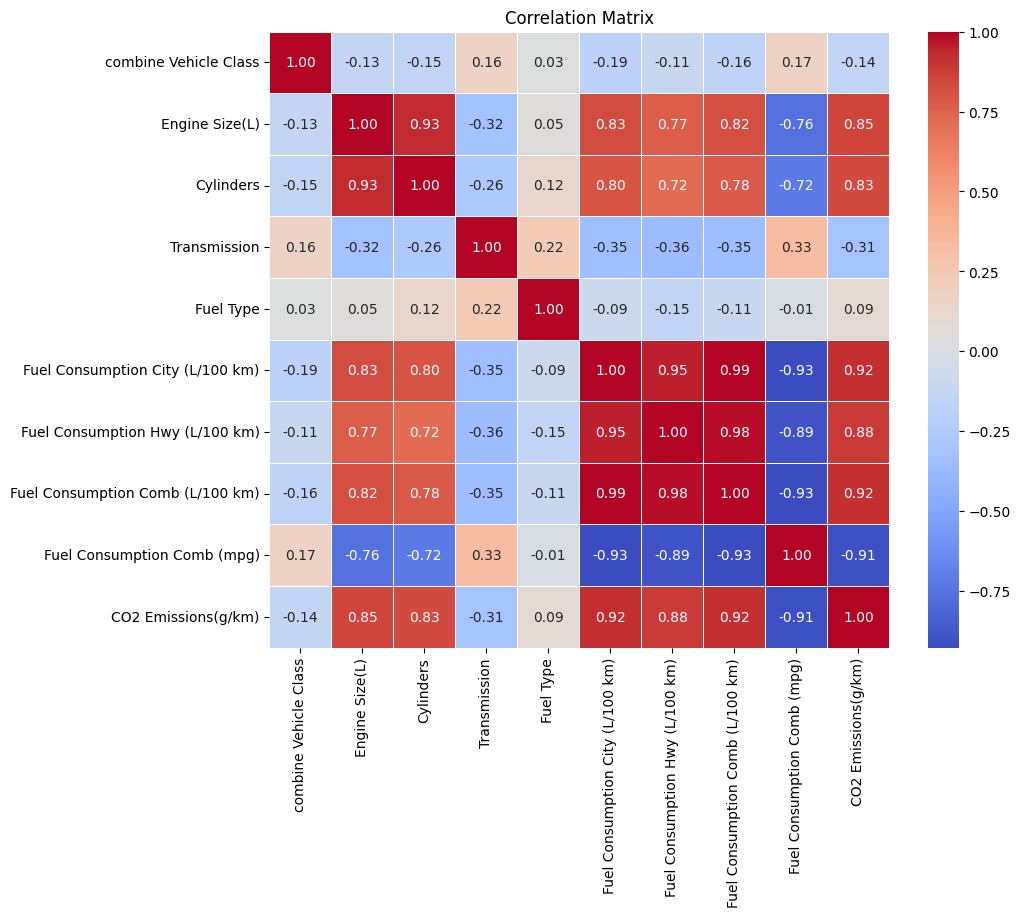

Plot saved at: /kaggle/working/correlation_heatmap.png


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")

# Save the figure in Kaggle's working directory
file_path = "/kaggle/working/correlation_heatmap.png"
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved at: {file_path}")


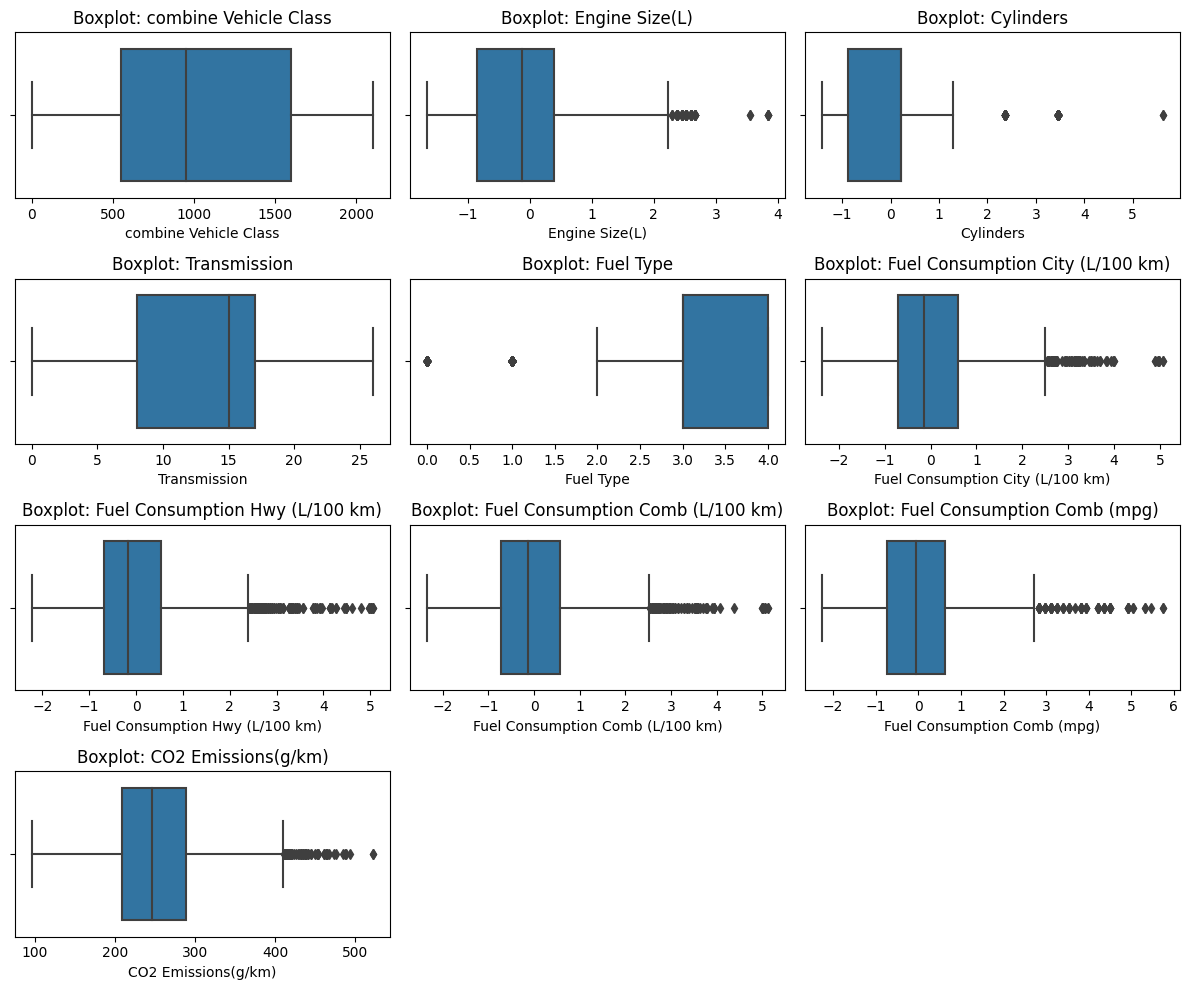

Plot saved at: /kaggle/working/numerical_boxplots.png


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set figure size for all plots
plt.figure(figsize=(12, 10))

# Get only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_columns)

# Calculate the number of rows and columns for subplots
rows = int(np.ceil(num_cols / 3))  # Ensuring enough rows for the plots
cols = 3  # Fixed number of columns

# Loop through each numerical column and plot a boxplot
for i, col in enumerate(numerical_columns):
    plt.subplot(rows, cols, i+1)  # Adjust layout dynamically
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')

plt.tight_layout()  # Ensure no overlap between subplots

# Save the figure in Kaggle's working directory
file_path = "/kaggle/working/numerical_boxplots.png"
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved at: {file_path}")



In [30]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df[numerical_cols])
abs_z_scores = np.abs(z_scores)

# Define a threshold to detect outliers
outliers = (abs_z_scores > 3).all(axis=1)

# Get rows with outliers
outlier_rows = df[outliers]

# Print number of outliers
print(f"Number of outliers detected: {len(outlier_rows)}")


Number of outliers detected: 0


In [30]:
threshold = 0.9  # Correlation threshold for removing highly correlated features
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print highly correlated pairs
print("Highly Correlated Pairs:")
for pair in highly_correlated_pairs:
    print(pair)

Highly Correlated Pairs:
('Cylinders', 'Engine Size(L)')
('Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)')
('Fuel Consumption Comb (L/100 km)', 'Fuel Consumption City (L/100 km)')
('Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Hwy (L/100 km)')
('Fuel Consumption Comb (mpg)', 'Fuel Consumption City (L/100 km)')
('Fuel Consumption Comb (mpg)', 'Fuel Consumption Comb (L/100 km)')
('CO2 Emissions(g/km)', 'Fuel Consumption City (L/100 km)')
('CO2 Emissions(g/km)', 'Fuel Consumption Comb (L/100 km)')
('CO2 Emissions(g/km)', 'Fuel Consumption Comb (mpg)')


In [31]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'df' is your dataframe with numerical features

# Step 1: Select only numerical columns (excluding the target column)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Add a constant to the data for intercept term (required by VIF calculation)
X = df[numerical_cols]
X = add_constant(X)

# Step 3: Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Step 4: Display the VIF results
print(vif_data)

# Step 5: Interpret the results: 
# High VIF values (e.g., > 5 or > 10) indicate multicollinearity.


                             Feature          VIF
0                              const   189.050037
1              combine Vehicle Class     1.116594
2                     Engine Size(L)     9.152392
3                          Cylinders     8.529496
4                       Transmission     1.242890
5                          Fuel Type     1.467528
6   Fuel Consumption City (L/100 km)  2226.539967
7    Fuel Consumption Hwy (L/100 km)   625.291091
8   Fuel Consumption Comb (L/100 km)  5052.640925
9        Fuel Consumption Comb (mpg)     9.314003
10               CO2 Emissions(g/km)    11.524525


In [32]:
df['Average Fuel Consumption'] = df[['Fuel Consumption City (L/100 km)', 
                                      'Fuel Consumption Hwy (L/100 km)', 
                                      'Fuel Consumption Comb (L/100 km)']].mean(axis=1)

# Drop the original highly correlated columns
df = df.drop(columns=['Fuel Consumption City (L/100 km)', 
                      'Fuel Consumption Hwy (L/100 km)', 
                      'Fuel Consumption Comb (L/100 km)'])


In [33]:
df.head()

,combine Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Average Fuel Consumption
0,0,-0.851086,-0.876934,14,4,0.771454,196,-0.885885
1,0,-0.558066,-0.876934,25,4,0.219329,221,-0.493198
2,1,-1.217362,-0.876934,22,4,2.841921,136,-1.677569
3,2,0.247740,0.206429,15,4,-0.332795,255,0.022017
4,10,0.247740,0.206429,15,4,-0.056733,244,-0.149352


model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Prepare the data
# Assuming df is your DataFrame and it contains the relevant features

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['CO2 Emissions(g/km)', 'combine Vehicle Class'])  # Dropping target and any irrelevant columns
y = df['CO2 Emissions(g/km)']

In [46]:
X = df.drop('CO2 Emissions(g/km)', axis=1)  # All columns except CO2 Emissions as features
y = df['CO2 Emissions(g/km)']  # CO2 Emissions is the target variable


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Ridge regression model (L2 regularization)
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength

# Train the model
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


R² Score: 0.9043
Mean Absolute Error (MAE): 12.1454
Mean Squared Error (MSE): 345.3843
Root Mean Squared Error (RMSE): 18.5845


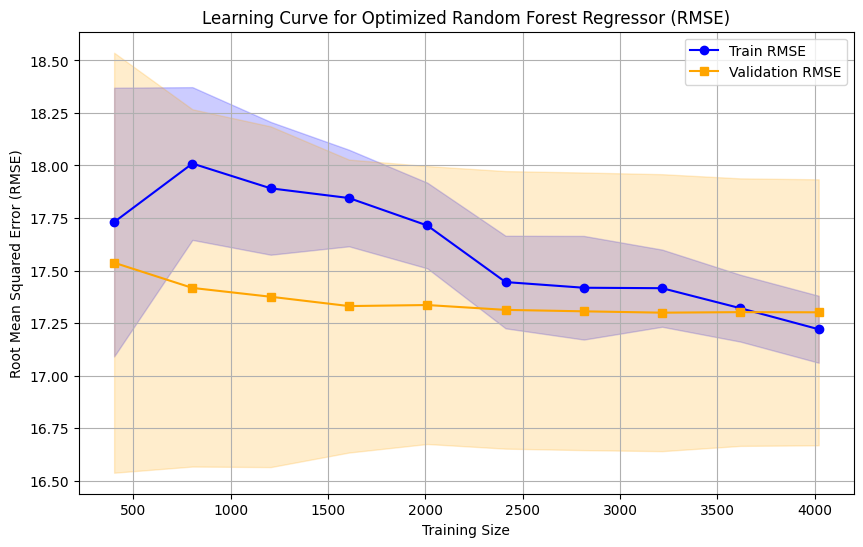

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

# Generate the learning curve for the optimized Random Forest Regressor
train_sizes, train_scores, test_scores = learning_curve(
    estimator=lr_model, X=X_train, y=y_train, cv=5,
    scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calculate mean and standard deviation for training and test scores (MSE)
train_mse_mean = -train_scores.mean(axis=1)
test_mse_mean = -test_scores.mean(axis=1)
train_mse_std = train_scores.std(axis=1)
test_mse_std = test_scores.std(axis=1)

# Convert MSE to RMSE (Root Mean Squared Error)
train_rmse_mean = np.sqrt(train_mse_mean)
test_rmse_mean = np.sqrt(test_mse_mean)
train_rmse_std = train_mse_std / (2 * train_rmse_mean)  # Adjusting for RMSE scale
test_rmse_std = test_mse_std / (2 * test_rmse_mean)  # Adjusting for RMSE scale

# Plot the learning curve for RMSE
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse_mean, label='Train RMSE', color='blue', marker='o')
plt.plot(train_sizes, test_rmse_mean, label='Validation RMSE', color='orange', marker='s')
plt.fill_between(train_sizes, train_rmse_mean - train_rmse_std, train_rmse_mean + train_rmse_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_rmse_mean - test_rmse_std, test_rmse_mean + test_rmse_std, color='orange', alpha=0.2)
plt.title('Learning Curve for Optimized Random Forest Regressor (RMSE)')
plt.xlabel('Training Size')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Random Forest Regressor Results:")
print(f"R² Score: {rf_r2:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")

# Save the trained model
model_path = "/kaggle/working/random_forest_model.pkl"
joblib.dump(rf_model, model_path)
print(f"Model saved at: {model_path}")


Random Forest Regressor Results:
R² Score: 0.9974
Mean Absolute Error (MAE): 2.0882
Mean Squared Error (MSE): 9.2352
Root Mean Squared Error (RMSE): 3.0389
Model saved at: /kaggle/working/random_forest_model.pkl


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Evaluate the optimized model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate 
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

# Print results
print(f"Optimized Random Forest Regressor Results:")
print(f"R² Score: {rf_r2:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Optimized Random Forest Regressor Results:
R² Score: 0.9960
Mean Absolute Error (MAE): 2.2822
Mean Squared Error (MSE): 14.5654
Root Mean Squared Error (RMSE): 3.8165


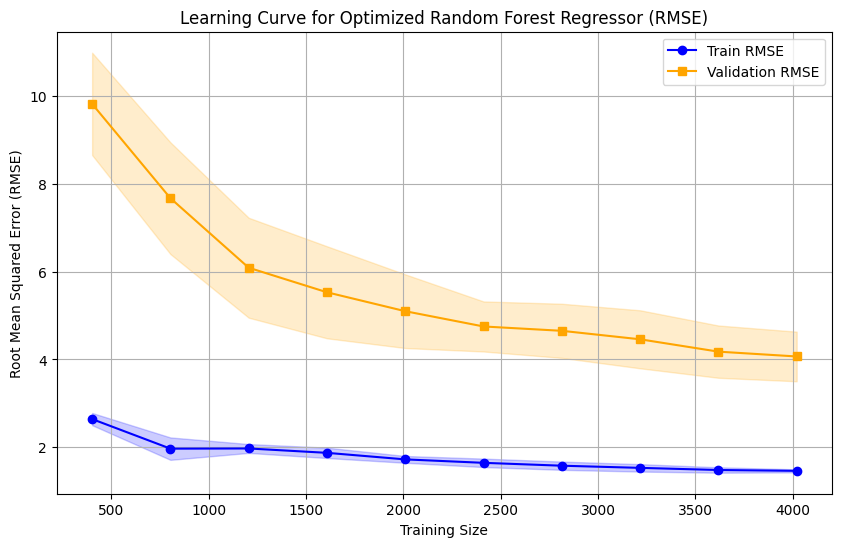

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

# Generate the learning curve for the optimized Random Forest Regressor
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_rf_model, X=X_train, y=y_train, cv=5,
    scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calculate mean and standard deviation for training and test scores (MSE)
train_mse_mean = -train_scores.mean(axis=1)
test_mse_mean = -test_scores.mean(axis=1)
train_mse_std = train_scores.std(axis=1)
test_mse_std = test_scores.std(axis=1)

# Convert MSE to RMSE (Root Mean Squared Error)
train_rmse_mean = np.sqrt(train_mse_mean)
test_rmse_mean = np.sqrt(test_mse_mean)
train_rmse_std = train_mse_std / (2 * train_rmse_mean)  # Adjusting for RMSE scale
test_rmse_std = test_mse_std / (2 * test_rmse_mean)  # Adjusting for RMSE scale

# Plot the learning curve for RMSE
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse_mean, label='Train RMSE', color='blue', marker='o')
plt.plot(train_sizes, test_rmse_mean, label='Validation RMSE', color='orange', marker='s')
plt.fill_between(train_sizes, train_rmse_mean - train_rmse_std, train_rmse_mean + train_rmse_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_rmse_mean - test_rmse_std, test_rmse_mean + test_rmse_std, color='orange', alpha=0.2)
plt.title('Learning Curve for Optimized Random Forest Regressor (RMSE)')
plt.xlabel('Training Size')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Random Forest Regressor Results:")
print(f"R² Score: {rf_r2:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")

# Save the trained model
model_path = "/kaggle/working/random_forest_model.pkl"
joblib.dump(rf_model, model_path)
print(f"Model saved at: {model_path}")


Random Forest Regressor Results:
R² Score: 0.9976
Mean Absolute Error (MAE): 1.9903
Mean Squared Error (MSE): 8.6278
Root Mean Squared Error (RMSE): 2.9373
Model saved at: /kaggle/working/random_forest_model.pkl


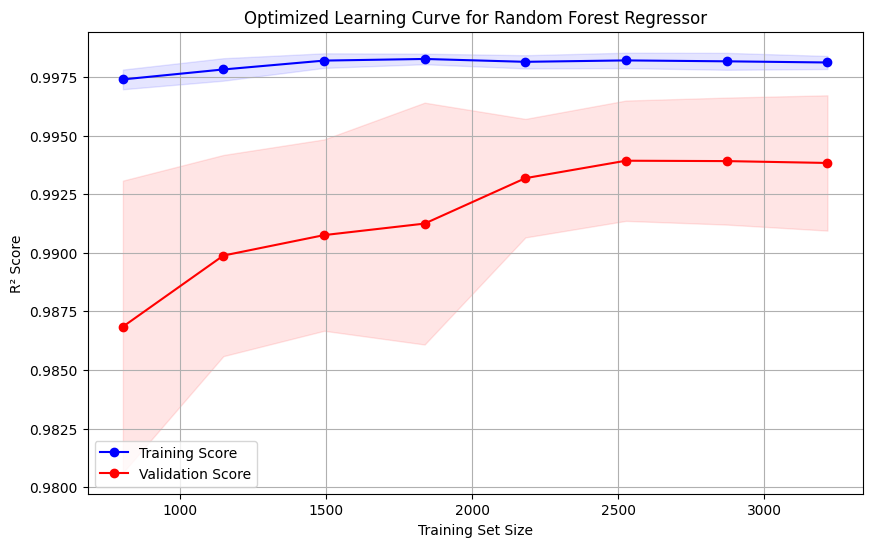

Optimized learning curve plot saved at: /kaggle/working/optimized_learning_curve_rf.png


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import ShuffleSplit

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model with reduced complexity
rf_model = RandomForestRegressor(
    n_estimators=200,        # More trees for stability
    max_depth=10,            # Limit tree depth to prevent overfitting
    min_samples_split=5,     # Require more samples per split
    random_state=42
)

# Define cross-validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Compute learning curve with adjusted training sizes
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=cv, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.2, 0.8, 8)  # Focus on stable learning region
)

# Compute mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Optimized Learning Curve for Random Forest Regressor")
plt.legend()
plt.grid()

# Save the learning curve plot
file_path = "/kaggle/working/optimized_learning_curve_rf.png"
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Optimized learning curve plot saved at: {file_path}")


In [42]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Random Forest Regressor Results:")
print(f"R² Score: {rf_r2:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")

# Save the trained model
model_path = "/kaggle/working/random_forest_model.pkl"
joblib.dump(rf_model, model_path)
print(f"Model saved at: {model_path}")


Random Forest Regressor Results:
R² Score: 0.9976
Mean Absolute Error (MAE): 1.9903
Mean Squared Error (MSE): 8.6278
Root Mean Squared Error (RMSE): 2.9373
Model saved at: /kaggle/working/random_forest_model.pkl


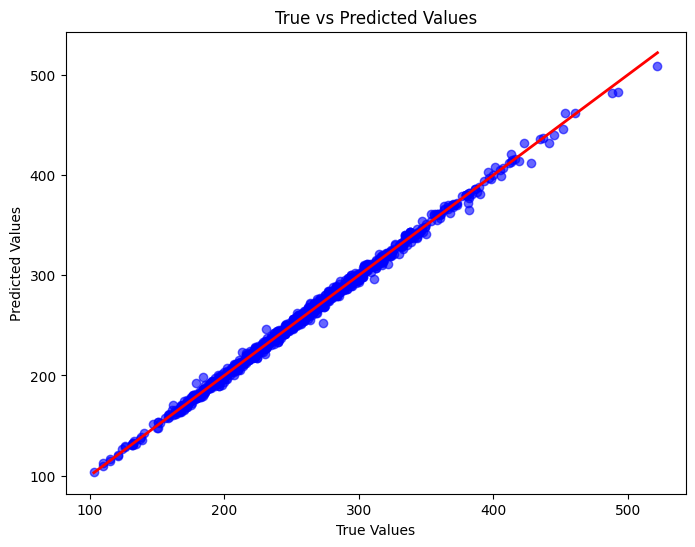

In [66]:
# Plot True vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", lw=2)  # Ideal line (y = x)
plt.title("True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Save the plot as PNG
plt.savefig('/kaggle/working/true_predict_plot_rf_model.png')

# Show the plot (optional)
plt.show()


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Evaluate the optimized model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate 
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

# Print results
print(f"Optimized Random Forest Regressor Results:")
print(f"R² Score: {rf_r2:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Optimized Random Forest Regressor Results:
R² Score: 0.9964
Mean Absolute Error (MAE): 2.1196
Mean Squared Error (MSE): 12.8708
Root Mean Squared Error (RMSE): 3.5876


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import numpy as np

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Define KFold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the training data
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Convert negative MSE to positive values (as we use 'neg_mean_squared_error' in cross_val_score)
mean_mse = -cross_val_scores.mean()
mean_rmse = np.sqrt(mean_mse)

# Print cross-validation results
print(f"Cross-validation Mean Squared Error (MSE): {mean_mse:.4f}")
print(f"Cross-validation Root Mean Squared Error (RMSE): {mean_rmse:.4f}")

# Fit the RandomForest model on the full training data
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for the test set
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

# Print results for the test set
print(f"\nTest Set Results (after training on full training data):")
print(f"R² Score: {rf_r2:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")


Cross-validation Mean Squared Error (MSE): 17.9171
Cross-validation Root Mean Squared Error (RMSE): 4.2329

Test Set Results (after training on full training data):
R² Score: 0.9974
Mean Absolute Error (MAE): 2.0882
Mean Squared Error (MSE): 9.2352
Root Mean Squared Error (RMSE): 3.0389


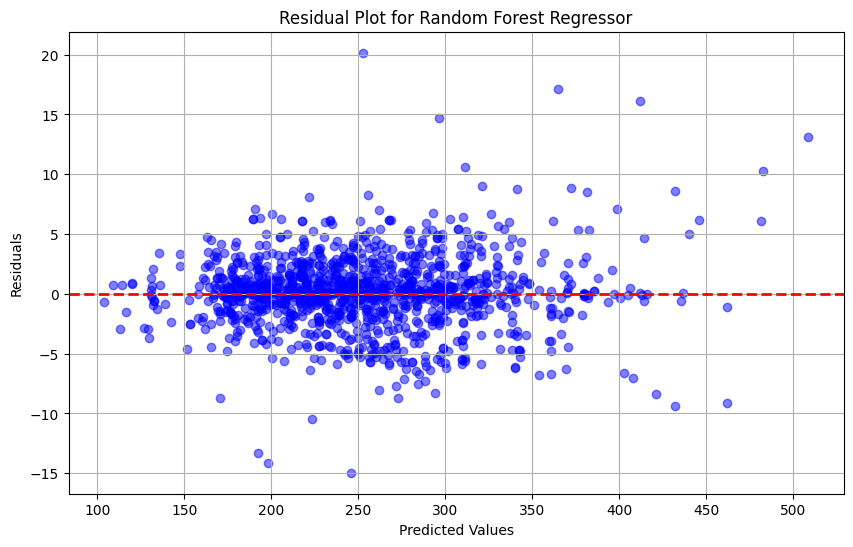

In [64]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_rf

# Create residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, color='blue', marker='o', alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Horizontal line at y=0
plt.title('Residual Plot for Random Forest Regressor')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

# Save the plot as an image
plt.savefig('/kaggle/working/residual_plot_rf_model.png')

# Show the plot
plt.show()


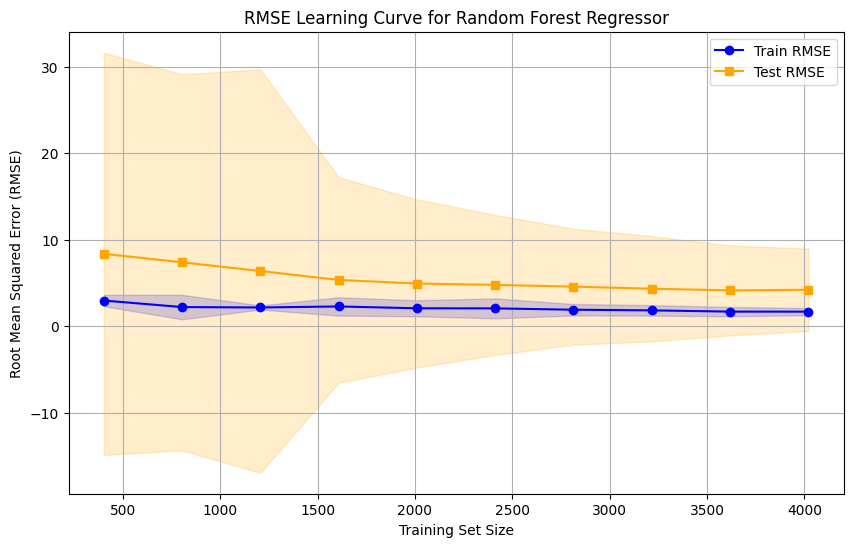

<Figure size 640x480 with 0 Axes>

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calculate mean and standard deviation for training and test scores
train_mean = -train_scores.mean(axis=1)  # Negate to get positive MSE
test_mean = -test_scores.mean(axis=1)    # Negate to get positive MSE

train_rmse = np.sqrt(train_mean)   # Convert MSE to RMSE for training data
test_rmse = np.sqrt(test_mean)     # Convert MSE to RMSE for test data

train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the RMSE learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, label='Train RMSE', color='blue', marker='o')
plt.plot(train_sizes, test_rmse, label='Test RMSE', color='orange', marker='s')
plt.fill_between(train_sizes, train_rmse - train_std, train_rmse + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_rmse - test_std, test_rmse + test_std, color='orange', alpha=0.2)
plt.title('RMSE Learning Curve for Random Forest Regressor')
plt.xlabel('Training Set Size')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.grid(True)
plt.show()

# Fit the RandomForest model on the full training data
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for the test set
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
# Save the plot as an image file in the Kaggle working directory
plt.savefig('/kaggle/working/learning_curve_rf_model.png')

# Show the plot
plt.show()


# Print test results
#print(f"\nTest Set Results (after training on full training data):")
#print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Step 2: Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'max_features': ['auto', 'sqrt', 'log2'],  # Features to consider for splits
    'bootstrap': [True, False]  # Whether to use bootstrap sampling
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Step 4: Fit the model with the optimal parameters
grid_search.fit(X_train, y_train)

# Step 5: Get the best parameters and model
best_rf_model = grid_search.best_estimator_

# Step 6: Evaluate the optimized model on the test set
y_pred_rf_optimized = best_rf_model.predict(X_test)

# Step 7: Evaluate the optimized model
rf_r2 = r2_score(y_test, y_pred_rf_optimized)
rf_mae = mean_absolute_error(y_test, y_pred_rf_optimized)
rf_mse = mean_squared_error(y_test, y_pred_rf_optimized)
rf_rmse = mean_squared_error(y_test, y_pred_rf_optimized, squared=False)

# Step 8: Display the results
print(f"Optimized Random Forest Regressor Results:")
print(f"R² Score: {rf_r2:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")

# Step 9: Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Optimized Random Forest Regressor Results:
R² Score: 0.9966
Mean Absolute Error (MAE): 0.0360
Mean Squared Error (MSE): 0.0035
Root Mean Squared Error (RMSE): 0.0594
Best Hyperparameters from GridSearchCV: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [37]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
dt_r2 = r2_score(y_test, y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = mean_squared_error(y_test, y_pred_dt, squared=False)

print(f"Decision Tree Regressor Results:")
print(f"R² Score: {dt_r2:.4f}")
print(f"Mean Absolute Error (MAE): {dt_mae:.4f}")
print(f"Mean Squared Error (MSE): {dt_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {dt_rmse:.4f}")


Decision Tree Regressor Results:
R² Score: 0.9950
Mean Absolute Error (MAE): 0.0361
Mean Squared Error (MSE): 0.0051
Root Mean Squared Error (RMSE): 0.0714


In [42]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, validation_fraction=0.2, 
                                     n_iter_no_change=10, random_state=42)

gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
gb_r2 = r2_score(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_rmse = mean_squared_error(y_test, y_pred_gb, squared=False)

print(f"Gradient Boosting Regressor Results:")
print(f"R² Score: {gb_r2:.4f}")
print(f"Mean Absolute Error (MAE): {gb_mae:.4f}")
print(f"Mean Squared Error (MSE): {gb_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {gb_rmse:.4f}")


Gradient Boosting Regressor Results:
R² Score: 0.9924
Mean Absolute Error (MAE): 0.0565
Mean Squared Error (MSE): 0.0078
Root Mean Squared Error (RMSE): 0.0882


In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Train-test split (Replace X and y with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor model
gb_model_optimized = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,
    max_features='sqrt',
    validation_fraction=0.2,
    n_iter_no_change=10,
    random_state=42
)
gb_model_optimized.fit(X_train, y_train)

# Predict and evaluate on train and test sets
y_pred_train = gb_model_optimized.predict(X_train)
y_pred_test = gb_model_optimized.predict(X_test)

# Metrics for train
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)  # Correct RMSE calculation for train

# Metrics for test
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)  # Correct RMSE calculation for test

# Print results
print(f"Gradient Boosting Optimized Model Results:")
print(f"Train R²: {r2_train:.4f}, Train MAE: {mae_train:.4f}, Train RMSE: {rmse_train:.4f}")
print(f"Test R²: {r2_test:.4f}, Test MAE: {mae_test:.4f}, Test RMSE: {rmse_test:.4f}")


Gradient Boosting Optimized Model Results:
Train R²: 0.9829, Train MAE: 0.0841, Train RMSE: 0.1305
Test R²: 0.9803, Test MAE: 0.0919, Test RMSE: 0.1424


In [50]:
import pandas as pd

# Create a dictionary to store results
model_results = {
    'Model': ['Linear Regression', 'rf_model', 'gb_model_optimized', 'Decision Tree Regressor'],
    'R² Score': [r2, rf_r2, r2_test, dt_r2],
    'MAE': [mae, rf_mae, mae_test, dt_mae],
    'MSE': [mse, rf_mse, gb_op_mse, dt_mse],
    'RMSE': [rmse, rf_rmse, gb_op_rmse, dt_rmse]
}

# Create a DataFrame to display the results
results_df = pd.DataFrame(model_results)

# Add an 'Observations' column based on the R² and MAE values

# Display the table with observations
print(results_df)


                     Model  R² Score       MAE       MSE      RMSE
0        Linear Regression  0.904322  0.203419  0.098235  0.313424
1                 rf_model  0.996565  0.036009  0.003527  0.059389
2       gb_model_optimized  0.980258  0.091858  0.020269  0.142371
3  Decision Tree Regressor  0.995029  0.036068  0.005104  0.071439


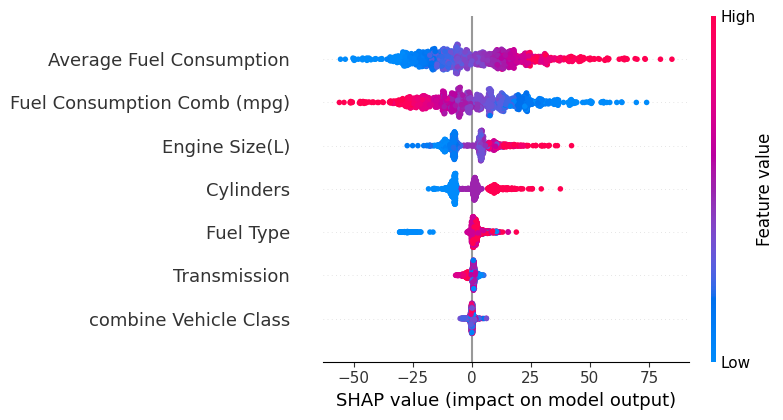

In [72]:
import shap
import matplotlib.pyplot as plt

# Train the Random Forest model (assuming model is already trained as rf_model)
rf_model =best_rf_model
#rf_model.fit(X_train, y_train)

# Use SHAP to explain the model's predictions
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Visualize the SHAP values for a specific instance (example for the first instance)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


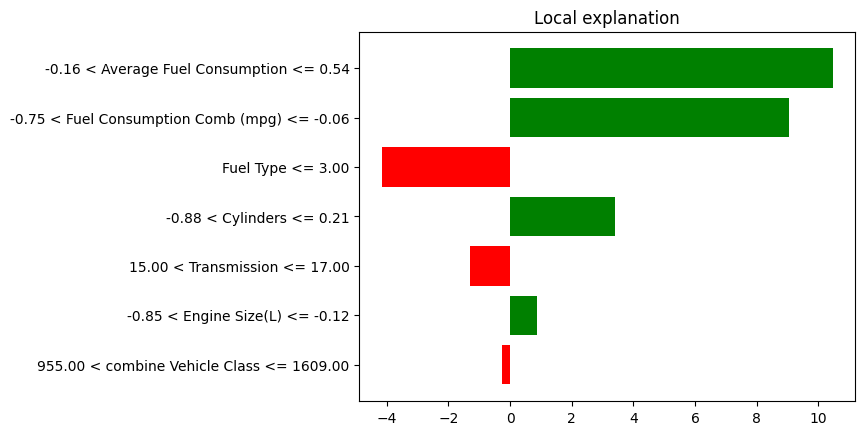

In [71]:
import warnings
from lime.lime_tabular import LimeTabularExplainer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Ignore all warnings
warnings.filterwarnings('ignore')

# Ensure X_train and X_test are DataFrames
# X_train = pd.DataFrame(X_train, columns=X.columns)
# X_test = pd.DataFrame(X_test, columns=X.columns)

# Initialize and train the RandomForest model
rf_model = best_rf_model
#rf_model.fit(X_train, y_train)  # Ensure the model is fitted

# Initialize the LimeTabularExplainer for regression
explainer = LimeTabularExplainer(
    training_data=X_train.values,  # Use X_train as numpy array
    mode='regression',  # Correct mode for regression
    feature_names=X_train.columns.tolist(),  # Ensure feature names are correct
    class_names=['CO2 Emissions'],  # Your target variable
    discretize_continuous=True
)

# Select a single instance from the test set for explanation
idx = 0
sample = X_test.iloc[idx].values

# Generate explanation for the selected instance
exp = explainer.explain_instance(
    data_row=sample,  # Sample data for explanation
    predict_fn=rf_model.predict  # Prediction function (RandomForest model)
)

# Display the explanation in the notebook
exp.show_in_notebook()

# Visualize the explanation as a plot
exp.as_pyplot_figure()
plt.show()
